In [259]:
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
import numpy as np
import math

In [262]:
def make_biclique(n):
    """
    Generates a complete bipartite graph (biclique) where one part of the graph
    has size 2n and the other has size 4n.
    """
    g = nx.Graph()
    small_side = range(1, 2 * n + 1)
    big_side = range(2 * n + 1, 6 * n + 1)
    g.add_nodes_from(small_side, bipartite = 0)
    g.add_nodes_from(big_side, bipartite = 1)
    edges = [(s, b) for s in small_side for b in big_side]
    g.add_edges_from(edges)
    
    assert nx.is_bipartite(g)
    return g

In [270]:
g = make_biclique(2)

In [271]:
nx.algorithms.bipartite.sets(g)

({1, 2, 3, 4}, {5, 6, 7, 8, 9, 10, 11, 12})

In [289]:
def lower_bound(n):
    nterm_1 = (n + 1) ** (n - (7 / 2))
    nterm_2 = (6 * (n ** 2)) - (4 * n) + 2
    nterm_3 = (2 * n) - 1
    nterm_4 = n ** 3
    nterm_5 = 2 ** ((2 * n) + (5 / 2))
    dterm_1 = math.pi
    dterm_2 = ((3 * n) - 1) ** ((3 * n) - (1 / 2))
    dterm_3 = ((2 * n) - 1) ** (n - (1 / 2))
    return (nterm_1 * nterm_2 * nterm_3 * nterm_4 * nterm_5) / (dterm_1 * dterm_2 * dterm_3)

def upper_bound(n):
    constant = (2 ** (7/2)) / math.pi
    numerator = (2 * n) - 1
    denominator = n ** ((3 * n) - 1)
    return constant * (numerator / denominator)

def complete_fraction(n):
    constant = math.sqrt(8 / math.pi)
    return constant / (math.sqrt(n))

def num_halvables(n):
    result = 0
    for k in range(1, 2 * n):
        first_combo = math.comb(2 * n, k)
        second_combo = math.comb(4 * n, (3 * n) - k)
        nterm_1 = k ** ((3 * n) - k)
        nterm_2 = ((3 * n) - k) ** k
        nterm_3 = ((2 * n) - k) ** (n - k)
        nterm_4 = (n + k) ** ((2 * n) - k)
        nterm_5 = (6 * (n ** 2)) - (4 * n * k) + (2 * (k ** 2))
        dterm_1 = k
        dterm_2 = (3 * n) - k
        dterm_3 = (2 * n) - k
        dterm_4 = n + k
        # result += ((nterm_1 * nterm_2 * nterm_3 * nterm_4 * nterm_5) / (dterm_1 * dterm_2 * dterm_3 * dterm_4))
        result += ((nterm_1 * nterm_2 * nterm_3 * nterm_4 * nterm_5) / (dterm_1 * dterm_2 * dterm_3 * dterm_4))
    return 0.5 * result

def num_trees(n):
    return ((2 * n) ** ((4 * n) - 1)) * ((4 * n) ** ((2 * n) - 1))

def biclique_fraction(n):
    n = int(n)
    return num_halvables(n) / num_trees(n)

In [290]:
ns = range(1, 29)
lowers = [lower_bound(n) for n in ns]
uppers = [upper_bound(n) for n in ns]
exacts = [biclique_fraction(n) for n in ns]

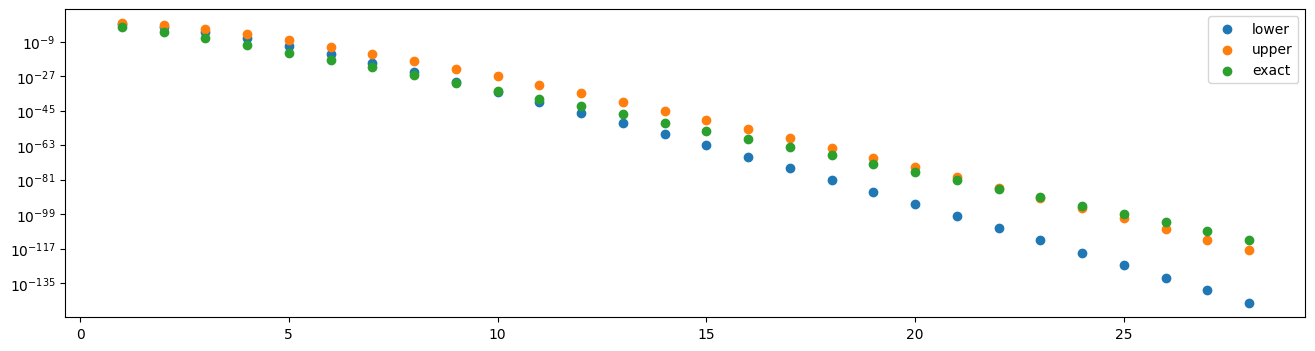

In [292]:
fig, ax = plt.subplots(figsize=(16,4))
plt.scatter(x=ns,
            y=lowers,
            label="lower",
           )
plt.scatter(x=ns,
            y=uppers,
            label="upper",
           )
plt.scatter(x=ns,
            y=exacts,
            label="exact",
           )
plt.legend()
plt.yscale("log")
plt.savefig("heuristics/plots/Hn_bounds.png", dpi=300, bbox_inches='tight')

In [87]:
def number_biclique_balanced_bipartitions(n):
    assert n % 2 == 0
    half_nodes = int((3 * n) / 2)
    result = 0
    for i in range(1, n):
        result += math.comb(2 * n, half_nodes - i) * math.comb(n, i)
    return 0.5 * result

In [234]:
def stirling(n):
    return math.sqrt(2 * math.pi * n) * ((n / math.e) ** n)

def babai_est(n):
    return (math.sqrt(2 * math.pi) / math.pi) * ((2 ** n) / math.sqrt(n))
    # return ((2 ** n) / math.sqrt(n))
    
# def my_a_est(n):
#     return (1 / math.sqrt(2 * math.pi)) * ((2 ** (3 * n)) / math.sqrt(3 * n))

# def my_b_est(n):
#     return (2 ** ((2 * n) + 1)) / math.sqrt((3 * math.pi * n) * (1.5 ** (3 * n)) * (0.5 ** n))

def my_comb_est(n):
    return ((2 ** (3 * n)) / math.sqrt(6 * math.pi * n)) - \
((2 ** ((2 * n) + 1)) / math.sqrt((3 * math.pi * n) * (1.5 ** (3 * n)) * (0.5 ** n)))

def nighttime_est(n):
    return ((2 ** (6 * n)) / math.sqrt(12 * math.pi * n)) - \
(2 ** (4 * n + 1)) / (math.sqrt(6 * math.pi * n) * (3 ** (3 * n)))

def claim_1(n):
    result = 0
    for i in range(1, 2 * n):
        result += math.comb(2 * n, i) * math.comb(4 * n, 3 * n - i)
    return 0.5 * result

def claim_2(n):
    return 0.5 * math.comb(6 * n, 3 * n) - math.comb(4 * n, 3 * n)

def upper_bound(n):
    constant = (2 ** (7/2)) / math.pi
    numerator = (2 * n) - 1
    denominator = n ** ((3 * n) - 1)
    return constant * (numerator / denominator)

def lower_bound(n):
    nterm_1 = (n + 1) ** (n - (7 / 2))
    nterm_2 = (6 * (n ** 2)) - (4 * n) + 2
    nterm_3 = (2 * n) - 1
    nterm_4 = n ** 3
    nterm_5 = 2 ** ((2 * n) + (5 / 2))
    dterm_1 = math.pi
    dterm_2 = ((3 * n) - 1) ** ((3 * n) - (1 / 2))
    dterm_3 = ((2 * n) - 1) ** (n - (1 / 2))
    return (nterm_1 * nterm_2 * nterm_3 * nterm_4 * nterm_5) / (dterm_1 * dterm_2 * dterm_3)

In [239]:
for n in range(1, 33):
    assert lower_bound(n) <= upper_bound(n)

In [219]:
for n in range(1, 15):
    assert claim_1(n) == claim_2(n)
# beyond 15 we get overflow errors I think...

In [220]:
ns = np.arange(1, 10)
# factorials = [math.factorial(n) for n in ns]
# stirlings = [stirling(n) for n in ns]
# stirlings_error = [factorials[i] - stirlings[i] for i in range(len(factorials))]

# combs = [math.comb(n, int(n/2)) for n in ns]
# combs_est = [babai_est(n) for n in ns]

# a_combs = [0.5 * math.comb(3 * n, int(1.5 * n)) for n in ns]
# a_combs_est = [my_a_est(n) for n in ns]

# b_combs = [math.comb(2 * n, int(1.5 * n)) for n in ns]
# b_combs_est = [stirling(2 * n) / (stirling(int(1.5 * n)) * stirling(int(0.5 * n))) for n in ns]
# b_combs_est = [my_b_est(n) for n in ns]

# bipartite_combs = [0.5 * math.comb(3 * n, int(1.5 * n)) - math.comb(2 * n, int(1.5 * n)) for n in ns]
# bipartite_combs_est = [my_comb_est(n) for n in ns]
# alternate_way = [number_biclique_balanced_bipartitions(n) for n in ns]

bipartite_combs = [claim_2(n) for n in ns]
bipartite_combs_est = [nighttime_est(n) for n in ns]

In [224]:
2 ** 6 * (3 ** 3)

1728

In [226]:
2 ** 8

256

In [215]:
for i in range(len(bipartite_combs)):
    print(bipartite_combs_est[i] - bipartite_combs[i])

0.05579174703207368
8.431593038352446
333.1211769332731
14112.184430907946
648620.8567741364
31614437.47290516
1606567649.4118347
84201622768.67773
4517088225125.625


In [221]:
for i in range(len(bipartite_combs)):
    print(bipartite_combs_est[i] - bipartite_combs[i])

4.150537222247902
37.600291691322354
559.7636854345837
15973.618319315836
664406.9630969465
31751072.167363167
1607767048.793396
84201622768.67578
4517088225125.625


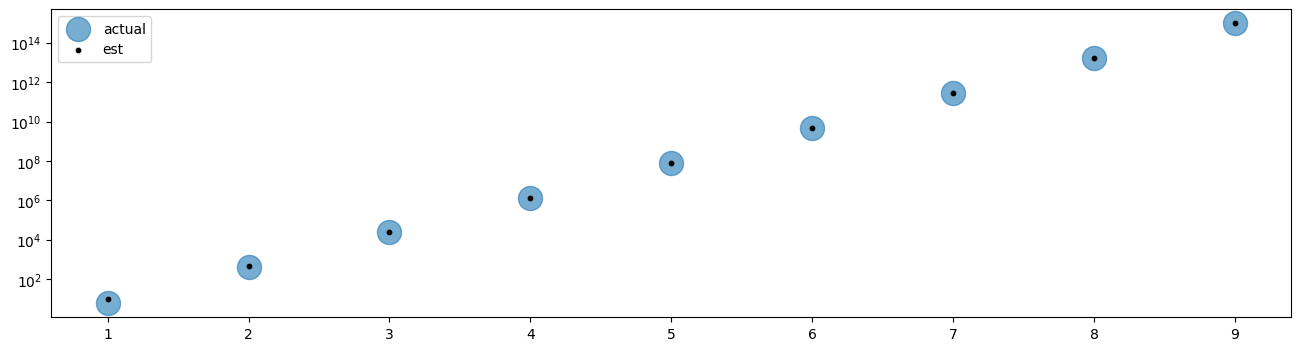

In [222]:
fig, ax = plt.subplots(figsize=(16,4))

plt.scatter(x=ns,
            y=bipartite_combs,
            s=300,
            alpha=0.6,
            label="actual",
           )
# plt.scatter(x=ns,
#             y=alternate_way,
#             s=100,
#             alpha=0.6,
#             label="alternate",
#            )
plt.scatter(x=ns,
            y=bipartite_combs_est,
            s=10,
            color='black',
            label="est",
           )
plt.yscale("log")
_ = plt.legend()